# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment2 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb</b> 

#### <b>Deadline</b>: <u>October-1-2019 11:59 PM.</u>


#### <font color='red'>NOTE: Please refer to the Ipython notebook named linearRegression.ipynb from class lecture. There are overlaps between that notebook and the assignment 2 </font>


#### Import your needed libraries in this cell

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt
from matplotlib.pyplot import contour


# Assignment 2 -- Part 1(Logistic regression without regularization )

In this exercise, you will implement logistic regression and apply it to dataset Assignment2_data1.txt

Import and examine the dataset Assignment2_data1.txt. There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted.

In this part of the Assignment, you will build a logistic regression model to predict whether a student gets admitted into a university (a model that estimates an applicant’s probability of admission based the scores from those two exams)


### Part 1, Q1  -- 10%

1. [5 points] Load the data and split it into X(features vector) and y(target/output vector).You can follow the way that has been shown in the class in the LinearRegression.ipynb. 

In [3]:
#path = os.getcwd() + '\test.txt'
data = pd.read_excel('test.xlsx', header=None, names=['x1', 'x2', 'x3','Class','L'])  
data

,x1,x2,x3,Class,L
0,55572.527016,165.140216,158.186448,1,4.0
1,50563.670573,164.915815,157.943743,1,4.4
2,42842.584076,164.546532,157.549211,1,5.2
3,39804.256129,164.415426,157.416770,1,5.6
4,32823.074090,164.108120,157.093743,1,6.8
...,...,...,...,...,...
2199,2688.373175,2240.398062,2103.742525,10,146.4
2200,2680.736844,2234.401339,2097.728184,10,146.8
2201,2665.245904,2222.485267,2085.599344,10,147.6
2202,2657.256463,2216.552138,2079.406716,10,148.0


In [40]:
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#(Import library, object creation, fitting model and prediction)

#Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm, datasets,metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint


#X.data.shape
pdList = data['x1'].to_frame()  # List of your dataframes
yy = pdList.join(data['x2'], lsuffix='_caller', rsuffix='_other')
yy  = yy.join(data['x3'], lsuffix='_caller', rsuffix='_other')

y = data['Class']
st_x = preprocessing.scale(yy)
#st_x = yy
print(st_x)

[[ 5.23292329 -0.50761117 -0.49209932]
 [ 4.71423414 -0.50763831 -0.49212966]
 [ 3.9146816  -0.50768296 -0.49217899]
 ...
 [-0.24585882 -0.25884807 -0.25112487]
 [-0.24668616 -0.25956547 -0.2518991 ]
 [-0.24849552 -0.26101166 -0.25355257]]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into the Training set and Test set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)
#from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(clf, X, y, cv=50)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C=1

# we create an instance of SVM and fit out data.
model = svm.SVC(kernel='linear', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of linear kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='rbf',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of rbf kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='poly',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of poly kernel SVC with Cross Validation is:",accuracy.mean() * 100)

model = svm.SVC(kernel='sigmoid',gamma= 'scale', C=C)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of sigmoid kernel SVC with Cross Validation is:",accuracy.mean() * 100)

Accuracy of linear kernel SVC with Cross Validation is: 73.57957937252164
Accuracy of rbf kernel SVC with Cross Validation is: 70.26411912288711
Accuracy of poly kernel SVC with Cross Validation is: 29.111977945387345
Accuracy of sigmoid kernel SVC with Cross Validation is: 63.560315177742545


In [42]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X1 = svc_param_selection(st_x, y, 50)
print(X1)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X2 = svc_param_selection(st_x, y, 50)
print(X2)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X3 = svc_param_selection(st_x, y, 50)
print(X3)
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 1000]
    gammas = [0.001, 0.01, 0.1, 1]
    #class_weight= [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas,'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='sigmoid'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_
X4 = svc_param_selection(st_x, y, 50)
print(X4)

C:\Users\anwer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1}


C:\Users\anwer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.001}


C:\Users\anwer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 1}
{'C': 1000, 'gamma': 0.01}


C:\Users\anwer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
model = svm.SVC(kernel='linear', C=1000,gamma=0.001)
y_pred = cross_val_predict(model,st_x, y, cv=50)
accuracy = metrics.balanced_accuracy_score(y, y_pred, sample_weight=None)
print("Accuracy of linear kernel SVC with Cross Validation is:",accuracy.mean() * 100)


Accuracy of linear kernel SVC with Cross Validation is: 100.0


2. [2 Points] Report optimal final θ.

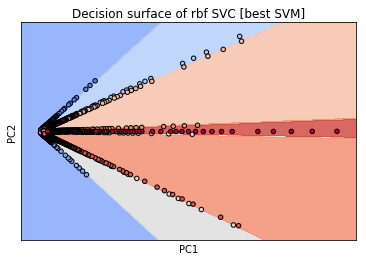

In [65]:
model = svm.SVC(kernel='linear',C=1000,gamma =0.001)
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of rbf SVC [best SVM]')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision surface of rbf SVC [best SVM]')
plt.show()
